<center>

# Predicción de aprobacion de un préstamo

</center>

##  Introducción

*Aquí va la introducción. Se redacta cuando el proyecto esté listo.*

##  Antecedentes

En el ámbito de los servicios financieros, las entidades bancarias y crediticias deben evaluar cuidadosamente a los solicitantes de préstamos para tomar decisiones informadas sobre su aprobación. Diversas variables relacionadas con las características personales, laborales y financieras de los solicitantes influyen directamente en la probabilidad de que un préstamo sea aprobado. Factores como el ingreso mensual, el historial crediticio, el estado civil, el tipo de empleo, el monto solicitado y el número de dependientes pueden tener un impacto significativo en la decisión final.

Con base en esta información, las instituciones financieras buscan optimizar sus procesos de evaluación de riesgo crediticio. Para ello, recurren al uso de técnicas de Machine Learning, que permiten construir modelos predictivos capaces de estimar la probabilidad de aprobación de un préstamo a partir de las características del solicitante. Esto no solo mejora la eficiencia operativa, sino que también contribuye a una asignación más justa y precisa del crédito.

## Definición del problema

Las entidades financieras que otorgan préstamos personales enfrentan el desafío de estimar con precisión la probabilidad de aprobación de una solicitud de crédito. Si bien existen múltiples factores que pueden influir en esta decisión como el ingreso del solicitante, su historial crediticio, el monto del préstamo solicitado o el número de dependientes no siempre es evidente cuáles son los más determinantes ni cómo interactúan entre sí. Esta falta de claridad, junto con la ausencia de insumos analíticos confiables para medir el riesgo del préstamo, complica significativamente la labor de estas instituciones. En particular, dificulta la evaluación precisa del riesgo crediticio, la asignación eficiente del crédito y la personalización adecuada de productos financieros, lo que puede derivar en decisiones erróneas, aumento de la morosidad y pérdida de competitividad en el mercado. 


## Justificación 

El desarrollo de un modelo predictivo que analice los factores personales y financieros de los solicitantes que tienen mayor influencia en la aprobación de préstamos, representa una herramienta de gran valor estratégico para las instituciones financieras. Al identificar con mayor precisión las variables más determinantes en la decisión crediticia, este tipo de modelo facilita los procesos de evaluación del riesgo, permitiendo una asignación de crédito más informada y eficiente. 

Además, la capacidad de predecir el riesgo asociado a cada solicitud facilita la creación de productos crediticios más personalizados, justos y alineados con el perfil de cada cliente, mejorando tanto la experiencia del usuario como la rentabilidad de la entidad. De esta manera, se promueve una toma de decisiones más estratégica y basada en datos, lo cual es fundamental en un entorno financiero cada vez más competitivo y orientado a la gestión proactiva del riesgo. 



## Objetivo general

Desarrollar un modelo de aprendizaje automático que prediga la aprobación o rechazo de una solicitud de préstamo personal, con el fin de apoyar a las instituciones financieras en la toma de decisiones estratégicas relacionadas con la evaluación de riesgos, la asignación de crédito y la personalización de productos financieros, basándose en las características personales, laborales y financieras de los solicitantes.

### Objetivos específicos

- Realizar un análisis exploratorio del conjunto de datos de Loan Status Prediction para depurar datos, identificar patrones y relaciones entre las variables.
- Entrenar modelos predictivos utilizando algoritmos de regresión para encontrar la variable objetivo Loan_Status: Loan approved (Y/N).
- Evaluar el rendimiento de los modelos para medir la precisión de las predicciones y seleccionar el que tenga el mejor desempeño.
- Realizar la optimización de hiperparámetros del modelo selecionado para mejorar su rendimiento.
- Desarrollar un sistema automatizado que permita utilizar las predicciones del modelo para predecir la variable objetivo Loan_Status: Loan approved (Y/N).



## Descripción del conjunto de datos
Este conjunto de datos disponible en Kaggle contiene información sobre solicitudes de préstamos personales y cada fila representa a un solicitante, incluyendo datos como:
- El ingreso del solicitante y ingreso del co-solicitante
- El monto del préstamo
- El historial crediticio, el estado civil y el tipo de empleo
- El estado del préstamo (aprobado o rechazado)
Este dataset nos permite analizar qué características influyen más en la aprobación de un préstamo personal.

## Características del Dataset
- Datos numéricos: Tiene números como el ingreso del solicitante, el ingreso del co-solicitante, el monto del préstamo y el historial crediticio.
- Datos categóricos: Incluye cosas como el estado civil, el tipo de empleo y el estado del préstamo (aprobado/rechazado).
- Variedad de datos: Es un dataset que mezcla datos fáciles de organizar (como números y categorías) con otros más variados como características personales, lo que lo hace interesante para analizar desde diferentes perspectivas.

### Resumen:
- Loan_ID: Identificador único del préstamo. (Cadena de texto)
- Gender: Género del solicitante (Male/Female). (Cadena de texto)
- Married: Estado civil (Yes/No). (Cadena de texto)
- Dependents: Número de personas dependientes. (Cadena de texto o entero)
- Education: Nivel educativo (Graduate/Not Graduate). (Cadena de texto)
- Self_Employed: Trabajador independiente (Yes/No). (Cadena de texto)
- ApplicantIncome: Ingreso del solicitante. (Entero)
- CoapplicantIncome: Ingreso del co-solicitante. (Entero)
- LoanAmount: Monto del préstamo (en miles). (Decimal)
- Loan_Amount_Term: Plazo del préstamo (en meses). (Entero)
- Credit_History: Historial crediticio (1 = cumple, 0 = no cumple). (Entero)
- Property_Area: Zona de residencia (Urban/Semiurban/Rural). (Cadena de texto)
- Employment_Type: Tipo de empleo. (Cadena de texto)
- Loan_Status: Estado del préstamo (Y = Aprobado, N = Rechazado). (Cadena de texto - variable objetivo) >> Variable objetivo


## Tamaño del Dataset
- 614 registros (solicitantes de préstamos)
- 13 columnas con distintas características personales y financieras 

## Limitaciones
- No incluye información detallada sobre el historial crediticio
- Puede haber sesgos en la distribución de datos (por ejemplo, más solicitantes aprobados que rechazados)
- No se especifica el año de recolección de los datos, lo que limita el análisis temporal

## Acceso al Dataset
El conjunto de datos está disponible públicamente en la plataforma Kaggle, bajo el nombre "Loan Status Prediction Dataset".
Enlace: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction


## Muestra del Dataset

In [21]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
prestamos = pd.read_csv('loan_data.csv')

In [23]:
prestamos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [24]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [25]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
prestamos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


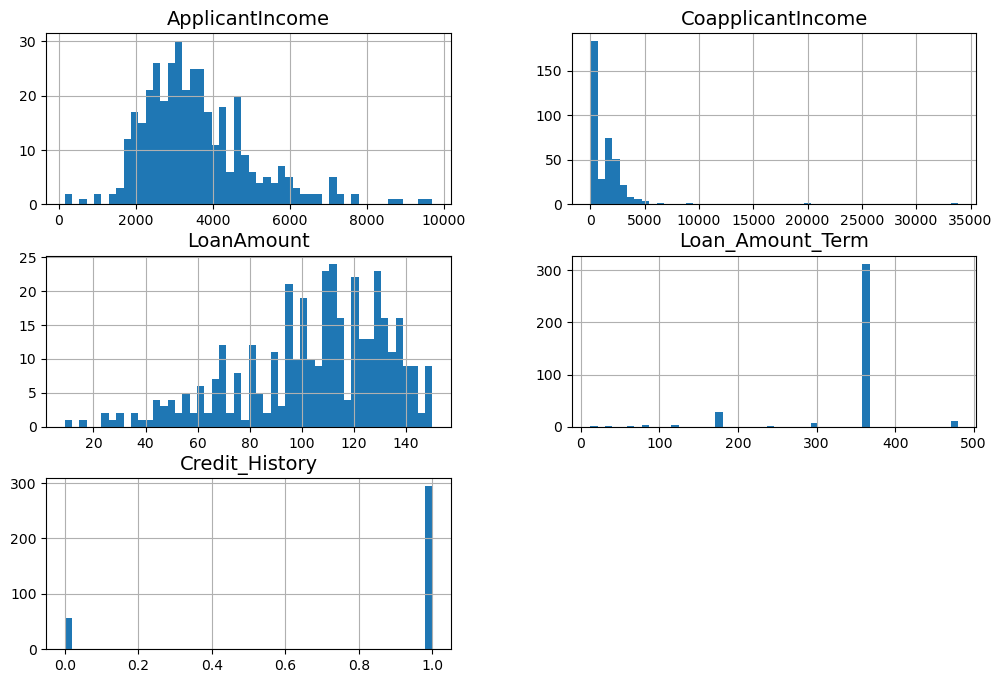

In [27]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
 
prestamos.hist(bins=50, figsize=(12, 8))
 
plt.show()

<Axes: ylabel='ApplicantIncome'>

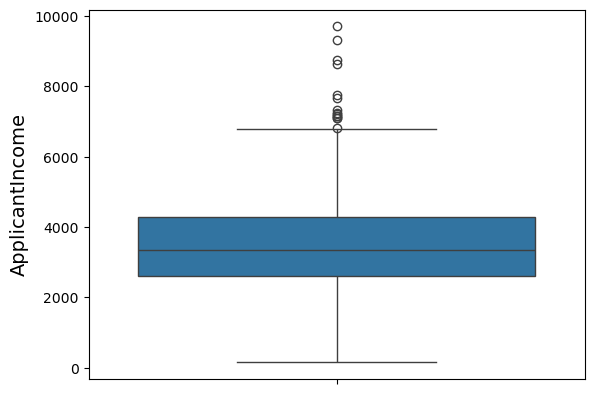

In [28]:
import seaborn as sns
sns.boxplot(data=prestamos['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

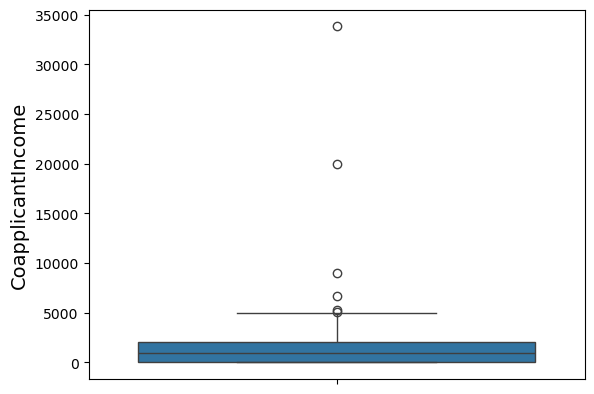

In [29]:
import seaborn as sns
sns.boxplot(data=prestamos['CoapplicantIncome'])

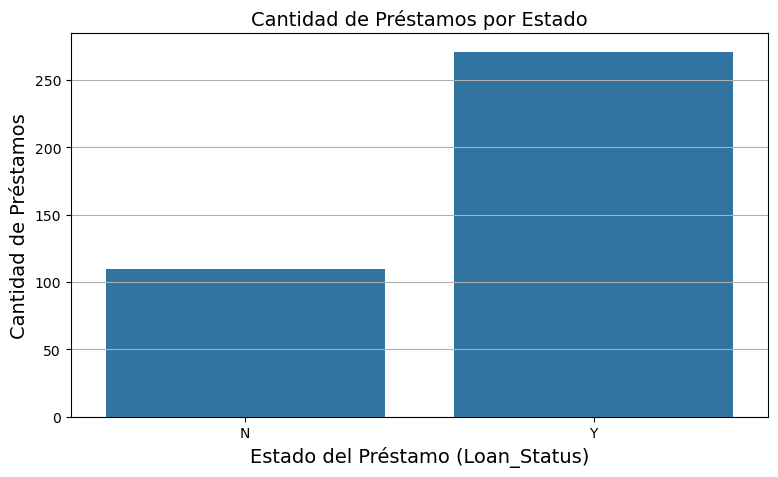

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de conteo por estado del préstamo
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=prestamos)
plt.title("Cantidad de Préstamos por Estado")
plt.xlabel("Estado del Préstamo (Loan_Status)")
plt.ylabel("Cantidad de Préstamos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [31]:
prestamosM = prestamos.melt(var_name="Variable", value_name="Valor")
prestamosM

,Variable,Valor
0,Loan_ID,LP001003
1,Loan_ID,LP001005
2,Loan_ID,LP001006
3,Loan_ID,LP001008
4,Loan_ID,LP001013
...,...,...
4948,Loan_Status,Y
4949,Loan_Status,Y
4950,Loan_Status,Y
4951,Loan_Status,Y


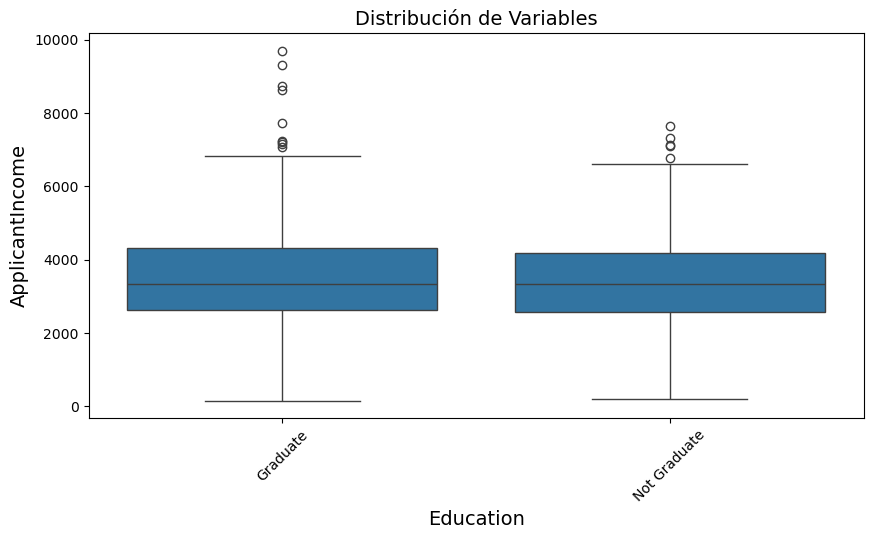

In [32]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="ApplicantIncome", data=prestamos)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [33]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

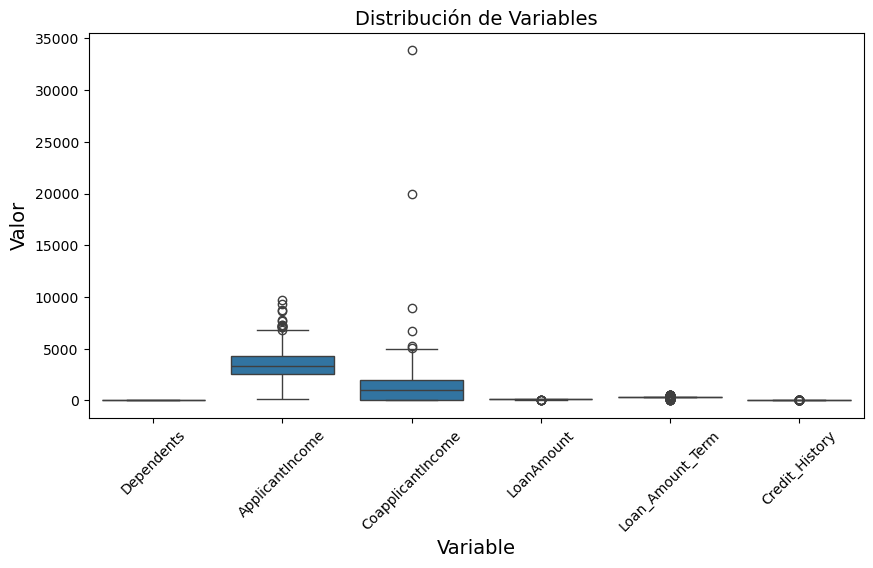

In [34]:
dfMelted = prestamos.melt(var_name="Variable", value_name="Valor")

dfMelted = dfMelted[pd.to_numeric(dfMelted["Valor"], errors="coerce").notnull()]
dfMelted["Valor"] = dfMelted["Valor"].astype(float)

dfMelted
# Generar el boxplot

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variable", y="Valor", data=dfMelted)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [35]:
corr_matrix = prestamos.corr(numeric_only=True)
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


In [36]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:

prestamos["Loan_Status_Num"] = prestamos["Loan_Status"].map({'Y': 1, 'N': 0})
corr_matrix = prestamos.corr(numeric_only=True)
corr_matrix["Loan_Status_Num"].sort_values(ascending=False)



Loan_Status_Num      1.000000
Credit_History       0.618937
LoanAmount           0.041220
CoapplicantIncome    0.009017
ApplicantIncome     -0.010167
Loan_Amount_Term    -0.047744
Name: Loan_Status_Num, dtype: float64

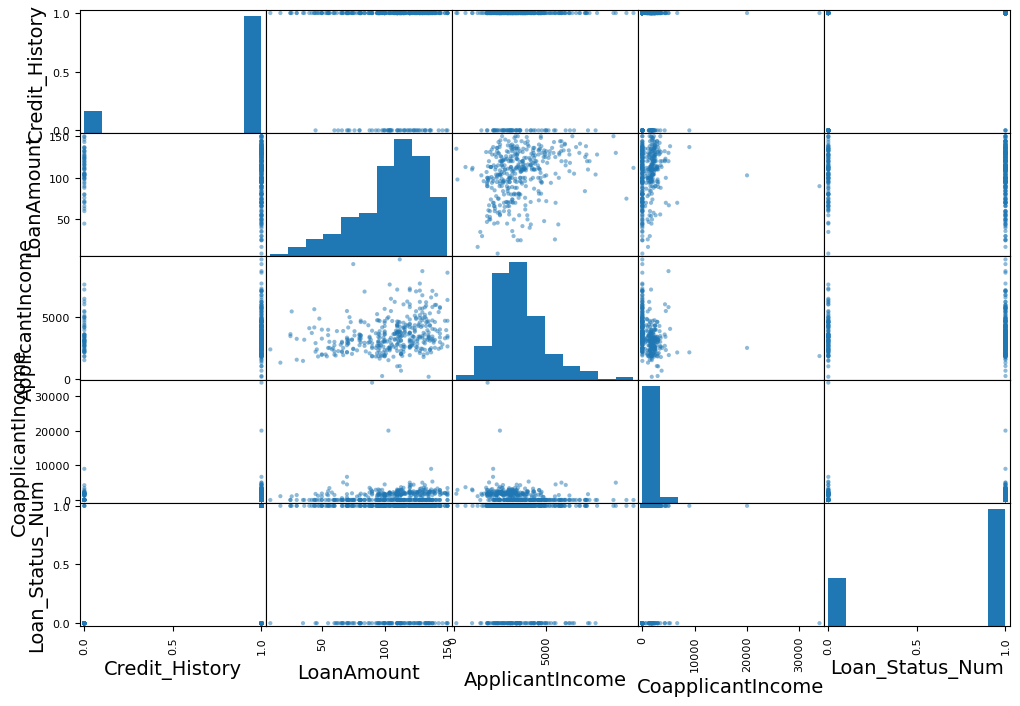

In [43]:
from pandas.plotting import scatter_matrix
 
attributes = ["Credit_History", "LoanAmount","ApplicantIncome", "CoapplicantIncome", "Loan_Status_Num"]
 
scatter_matrix(prestamos[attributes], figsize=(12, 8))
 
plt.show()

In [45]:
from sklearn.model_selection import train_test_split as tts
# Definimos los rangos de ingreso
bins = [0, 2500, 4000, 6000, prestamos['ApplicantIncome'].max()]
labels = [0, 1, 2, 3] 

prestamos['ingreso_cat'] = pd.cut(prestamos['ApplicantIncome'], bins=bins, labels=labels)

#convertimos las variables categoricas
mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
prestamos['zona_cat'] = prestamos['Property_Area'].map(mapping)

train_set, test_set = tts(prestamos, test_size=0.2, random_state=42)

print("train set size:", train_set.shape)
print("test set size:", test_set.shape)

train set size: (304, 16)
test set size: (77, 16)


In [46]:


#creamos los datasets estratificados
strat_train_set, strat_test_set = tts(
    prestamos,
    test_size=0.2,
    stratify=prestamos['zona_cat'],
    random_state=42
)

def zona_cat_proportions(data):
    return data["zona_cat"].value_counts() / len(data)

zona_cat_proportions(strat_train_set)

zona_cat
1    0.391447
2    0.328947
0    0.279605
Name: count, dtype: float64

In [47]:

# Creamos los datasets estratificados
strat_train_set, strat_test_set = tts(
    prestamos,
    test_size=0.2,
    stratify=prestamos['ingreso_cat'],  # usamos la variable categórica creada
    random_state=42
)
def ingreso_cat_proportions(data):
    return data['ingreso_cat'].value_counts(normalize=True)

print("Proporciones por categoría de ingreso (entrenamiento):")
print(ingreso_cat_proportions(strat_train_set))

Proporciones por categoría de ingreso (entrenamiento):
ingreso_cat
1    0.476974
2    0.233553
0    0.226974
3    0.062500
Name: proportion, dtype: float64


In [48]:

# Comparamos proporciones: general, estratificada y aleatoria
compare_props = pd.DataFrame({
    "Overall %": ingreso_cat_proportions(prestamos),
    "Stratified %": ingreso_cat_proportions(strat_test_set),
    "Random %": ingreso_cat_proportions(test_set),
}).sort_index()

# Cambiamos el nombre del índice
compare_props.index.name = "Categoría de ingreso"

# Calculamos el error porcentual
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)

compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)

# Mostramos la tabla con porcentajes y errores
compare_props_final = (compare_props * 100).round(2)
print(compare_props_final)


                      Overall %  Stratified %  Random %  Strat. Error %  \
Categoría de ingreso                                                      
0                         22.83         23.38     31.17            2.37   
1                         47.51         46.75     38.96           -1.59   
2                         23.36         23.38     20.78            0.07   
3                          6.30          6.49      9.09            3.08   

                      Rand. Error %  
Categoría de ingreso                 
0                             36.50  
1                            -17.99  
2                            -11.05  
3                             44.32  


In [49]:



#creamos los primeros datasets de prueba y entranamiento
#train_set, test_set = tts(prestamos, test_size=0.2, random_state=42)
print("train set size: ",train_set.shape)
print("test set size: ", test_set.size)

train set size:  (304, 16)
test set size:  1232


In [50]:


#creamos los datasets estratificados
strat_train_set, strat_test_set = tts(
    prestamos,
    test_size=0.2,
    stratify=prestamos['zona_cat'],
    random_state=42
)

def zona_cat_proportions(data):
    return data["zona_cat"].value_counts() / len(data)

zona_cat_proportions(strat_train_set)

zona_cat
1    0.391447
2    0.328947
0    0.279605
Name: count, dtype: float64

In [51]:
zona_cat_proportions(strat_test_set)

zona_cat
1    0.389610
2    0.337662
0    0.272727
Name: count, dtype: float64

In [53]:
compare_props = pd.DataFrame({
    "Overall %": zona_cat_proportions(prestamos),
    "Stratified %": zona_cat_proportions(strat_test_set),
    "Random %": zona_cat_proportions(test_set),
}).sort_index()
 
compare_props.index.name = "Propiedades (zona) de los solicitantes"
 
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
 
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
 
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Propiedades (zona) de los solicitantes,,,,,
0,27.82,27.27,24.68,-1.97,-11.31
1,39.11,38.96,38.96,-0.37,-0.37
2,33.07,33.77,36.36,2.10,9.96
